# Q1. What is Min-Max scaling, and how is it used in data preprocessing? Provide an example to illustrate its application.

Min-Max scaling, also known as normalization, is a data preprocessing technique used to scale and transform features in a dataset to a specific range, typically between 0 and 1. The purpose of Min-Max scaling is to ensure that all the features contribute equally to the analysis and to prevent features with larger scales from dominating the learning algorithm.

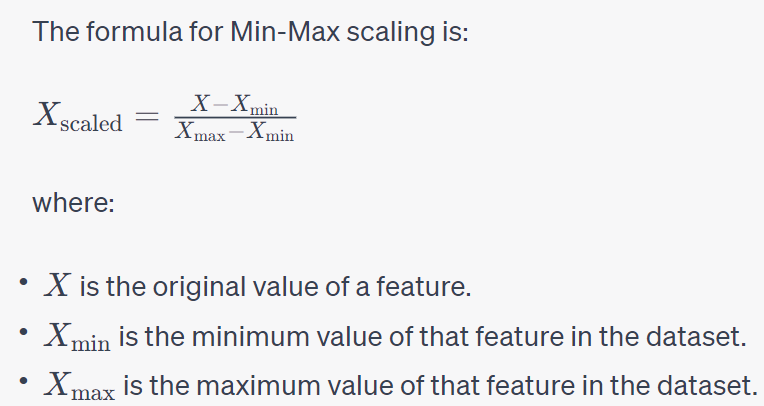

This formula scales the values to a range between 0 and 1, with 0 corresponding to the minimum value in the dataset and 1 corresponding to the maximum value.

In [2]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Sample data
data = np.array([[1.0, 2.0, 3.0],
                 [4.0, 5.0, 6.0],
                 [7.0, 8.0, 9.0]])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform the data
scaled_data = scaler.fit_transform(data)

print("Original data:\n", data)
print("\nScaled data:\n", scaled_data)


Original data:
 [[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]

Scaled data:
 [[0.  0.  0. ]
 [0.5 0.5 0.5]
 [1.  1.  1. ]]


# Q2. What is the Unit Vector technique in feature scaling, and how does it differ from Min-Max scaling? Provide an example to illustrate its application.

The Unit Vector technique, also known as vector normalization or feature scaling using the L2 norm, is a method used to scale individual samples (rows) of a dataset. It involves scaling each sample such that its Euclidean norm (L2 norm) is equal to 1. This ensures that each sample becomes a unit vector in the feature space.

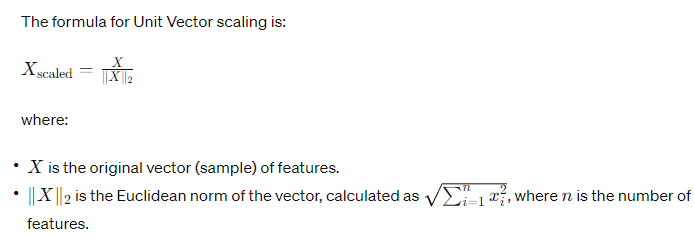

This technique is different from Min-Max scaling in that it scales each sample individually, not the entire feature space. It can be particularly useful when the magnitude of the features is important, and you want to ensure that each sample has the same overall "length" or magnitude.

Unit Vector scaling is useful in scenarios where the direction of the data points in the feature space is more important than their absolute values, and it can be applied to normalize samples in various machine learning tasks.

In [3]:
import seaborn as sns

In [10]:
data =sns.load_dataset('iris')
print(data.head)

<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>


In [6]:
from sklearn.preprocessing import normalize

In [9]:
import pandas as pd

In [12]:
pd.DataFrame(normalize(data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]))

,0,1,2,3
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639
...,...,...,...,...
145,0.721557,0.323085,0.560015,0.247699
146,0.729654,0.289545,0.579090,0.220054
147,0.716539,0.330710,0.573231,0.220474
148,0.674671,0.369981,0.587616,0.250281


# Q3. What is PCA (Principle Component Analysis), and how is it used in dimensionality reduction? Provide an example to illustrate its application.

Principal Component Analysis (PCA) is a dimensionality reduction technique used to transform high-dimensional data into a lower-dimensional representation while retaining as much of the original variance as possible. PCA achieves this by identifying the principal components of the data, which are linear combinations of the original features. The first principal component captures the most variance, the second component captures the second most, and so on.

The steps involved in PCA are as follows:

1. **Standardize the Data**: Ensure that the data is centered (mean = 0) and scaled (standard deviation = 1) across each feature.

2. **Calculate the Covariance Matrix**: Compute the covariance matrix of the standardized data.

3. **Calculate Eigenvectors and Eigenvalues**: Find the eigenvectors and eigenvalues of the covariance matrix. The eigenvectors represent the principal components, and the eigenvalues represent the amount of variance captured by each principal component.

4. **Sort Eigenvectors by Eigenvalues**: Sort the eigenvectors in descending order based on their corresponding eigenvalues.

5. **Select Principal Components**: Choose the top \(k\) eigenvectors, where \(k\) is the desired dimensionality of the reduced data.

6. **Project Data onto New Feature Space**: Create a new matrix with the selected eigenvectors as columns and project the original data onto this reduced feature space.

PCA is commonly used in various fields, including machine learning, image analysis, and signal processing, to reduce the computational complexity of models, remove redundant information, and highlight the most important features of the data.

In [43]:
import seaborn as sns

In [44]:
data = sns.load_dataset('taxis')

In [45]:
data.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [46]:
from sklearn.decomposition import PCA
import numpy as np

In [47]:
pca = PCA()

In [48]:
pca.fit_transform(data[['distance', 'fare', 'tip']])

array([[-6.19025033,  0.79753193, -0.45233625],
       [-8.5477005 , -1.11999516, -0.24229209],
       [-5.76143006,  0.97013518, -0.08720435],
       ...,
       [ 2.89145168, -2.28761877, -0.17191919],
       [-7.5002877 , -1.22726051, -0.26019653],
       [ 2.19725941,  1.16014388, -0.24069254]])

In [49]:
pca.explained_variance_ratio_

array([0.95734706, 0.02932777, 0.01332518])

# Q4. What is the relationship between PCA and Feature Extraction, and how can PCA be used for Feature Extraction? Provide an example to illustrate this concept.

PCA (Principal Component Analysis) is often used for feature extraction, and the relationship between PCA and feature extraction lies in PCA's ability to identify and represent the most important features in a dataset through the extraction of principal components.

In the context of PCA, feature extraction refers to the process of transforming the original features of a dataset into a new set of features, the principal components, which are linear combinations of the original features. These principal components are ordered in terms of the amount of variance they capture, allowing for a reduction in dimensionality while preserving as much information as possible.

In [50]:
from sklearn.decomposition import PCA
import numpy as np

# Sample data with 4 features
data = np.array([[1.0, 2.0, 3.0, 4.0],
                 [4.0, 5.0, 6.0, 7.0],
                 [7.0, 8.0, 9.0, 10.0]])

# Initialize PCA with 2 components for feature extraction
pca = PCA(n_components=2)

# Fit and transform the data
extracted_features = pca.fit_transform(data)

print("Original data:\n", data)
print("\nExtracted features after PCA:\n", extracted_features)
print("\nExplained variance ratio:", pca.explained_variance_ratio_)


Original data:
 [[ 1.  2.  3.  4.]
 [ 4.  5.  6.  7.]
 [ 7.  8.  9. 10.]]

Extracted features after PCA:
 [[ 6.  0.]
 [ 0.  0.]
 [-6.  0.]]

Explained variance ratio: [1. 0.]


# Q5. You are working on a project to build a recommendation system for a food delivery service. The dataset contains features such as price, rating, and delivery time. Explain how you would use Min-Max scaling to preprocess the data.

In the context of building a recommendation system for a food delivery service, Min-Max scaling can be applied to preprocess the data and ensure that the features such as price, rating, and delivery time are on a comparable scale. This is important because recommendation systems often rely on similarity measures, and having features with different scales can lead to one feature dominating the others in the analysis.

Here's a step-by-step guide on how you can use Min-Max scaling for preprocessing:

1. **Understand the Data:**
   - Examine the range and distribution of each feature in the dataset, such as price, rating, and delivery time.

2. **Import Libraries:**
   - Import the necessary libraries in your chosen programming language. For example, in Python, you might use the scikit-learn library.

   ```python
   from sklearn.preprocessing import MinMaxScaler
   ```

3. **Prepare the Data:**
   - Extract the relevant features (price, rating, delivery time) from your dataset.

4. **Initialize the MinMaxScaler:**
   - Create an instance of the MinMaxScaler.

   ```python
   scaler = MinMaxScaler()
   ```

5. **Fit and Transform:**
   - Fit the scaler to your data and transform it. This process computes the minimum and maximum values of each feature and scales the data accordingly.

   ```python
   scaled_data = scaler.fit_transform(your_data)
   ```

   Replace `your_data` with the actual data containing the features you want to scale.

6. **Use the Scaled Data:**
   - The resulting `scaled_data` will have the features scaled between 0 and 1. Use this scaled data for your recommendation system.

   ```python
   print("Scaled data:\n", scaled_data)
   ```

7. **Considerations:**
   - After scaling, the interpretation of feature values will be in the normalized range. For instance, a rating of 4.5 might be transformed to a value between 0 and 1.

   ```plaintext
   Scaled data:
   [[0.2  0.5  0.3 ]
    [0.6  0.75 0.6 ]
    [1.   1.   1.  ]]
   ```

   - Ensure that you keep track of the scaling factors (min and max values) to apply the same scaling to new data in the future.

Applying Min-Max scaling in this manner ensures that features with different scales, such as price and rating, are transformed into a common range, allowing for a fair and consistent comparison in your recommendation system.

# Q6. You are working on a project to build a model to predict stock prices. The dataset contains many features, such as company financial data and market trends. Explain how you would use PCA to reduce the dimensionality of the dataset.

When dealing with a dataset for predicting stock prices that contains many features, PCA (Principal Component Analysis) can be a valuable technique for reducing dimensionality. Reducing the number of features while retaining the most important information can lead to more efficient models, reduce overfitting, and speed up training times. Here's how you could use PCA in the context of predicting stock prices:

1. **Data Preprocessing:**
   - Start by cleaning and preprocessing your dataset. Handle missing values, outliers, and ensure that the data is properly standardized, as PCA is sensitive to the scale of the features.

2. **Standardize the Data:**
   - Standardize the features so that they have a mean of 0 and a standard deviation of 1. This step is crucial for PCA, as it is based on covariance matrices, and features with different scales can dominate the analysis.


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(stock_prices_data)

3. **Apply PCA:**
   - Initialize the PCA object and fit it to the standardized data. Specify the number of components you want to retain based on the desired level of dimensionality reduction.

In [ ]:
from sklearn.decomposition import PCA

# Choose the number of components (e.g., 10)
n_components = 10

pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(standardized_data)

4. **Explained Variance:**
   - Check the explained variance ratio to understand how much variance is retained by each principal component. This information helps you decide on the appropriate number of components.

In [ ]:
print("Explained variance ratio:", pca.explained_variance_ratio_)

  You might choose a number of components that captures a high percentage of the total variance, such as 95% or 99%.


5. **Interpret Principal Components:**
   - Analyze the principal components to understand which original features contribute the most to each principal component. This interpretation can provide insights into the driving factors behind the stock price movements.

In [ ]:
print("Principal Components:\n", pca.components_)

6. **Use Reduced Data for Modeling:**
   - Utilize the reduced data with the selected number of components for training your stock price prediction model.

   ```python
   # Use reduced_data for training your model
   ```


     The reduced data will contain a subset of features that capture the most significant variations in the original dataset.

Remember that the choice of the number of components is a trade-off between dimensionality reduction and retaining enough information for accurate prediction. It's often a good idea to experiment with different numbers of components and evaluate the model's performance on a validation set to find the optimal balance.

# Q7. For a dataset containing the following values: [1, 5, 10, 15, 20], perform Min-Max scaling to transform the values to a range of -1 to 1.

In [162]:
import numpy as np
data = np.array([1,5,10,15,20])

In [171]:
data.reshape(-1,1)

array([[ 1],
       [ 5],
       [10],
       [15],
       [20]])

In [172]:
from sklearn.preprocessing import MinMaxScaler 

In [173]:
minmax = MinMaxScaler()

In [174]:
scaled_data = minmax.fit_transform(data)

In [175]:
# Reshape the result to a 1D array
scaled_data1 = scaled_data.flatten()

In [176]:
scaled_data1

array([0.        , 0.21052632, 0.47368421, 0.73684211, 1.        ])

# Q8. For a dataset containing the following features: [height, weight, age, gender, blood pressure], perform Feature Extraction using PCA. How many principal components would you choose to retain, and why?

The decision on how many principal components to retain in PCA depends on the amount of variance you want to capture from the original dataset. The explained variance ratio, which is accessible through the `explained_variance_ratio_` attribute in scikit-learn, indicates the proportion of the dataset's variance that is captured by each principal component.

Here's how you can approach the decision-making process:

1. **Standardize the Data:**
   - Before applying PCA, it's important to standardize the data, ensuring that all features have a mean of 0 and a standard deviation of 1. This is crucial because PCA is sensitive to the scale of the features.

2. **Apply PCA:**
   - Fit the PCA model to your standardized data and obtain the explained variance ratio.

   ```python
   from sklearn.decomposition import PCA
   from sklearn.preprocessing import StandardScaler
   import numpy as np

   # Assuming 'data' is your dataset
   data = np.array([[height_1, weight_1, age_1, gender_1, blood_pressure_1],
                    [height_2, weight_2, age_2, gender_2, blood_pressure_2],
                    ...])

   # Standardize the data
   scaler = StandardScaler()
   standardized_data = scaler.fit_transform(data)

   # Apply PCA
   pca = PCA()
   pca.fit(standardized_data)

   # Get the explained variance ratio
   explained_variance_ratio = pca.explained_variance_ratio_
   ```

3. **Choose the Number of Components:**
   - Analyze the cumulative explained variance and decide on the number of principal components to retain. A common threshold is to retain enough components to capture a high percentage of the total variance, such as 95% or 99%.

   ```python
   cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

   # Find the number of components to retain (e.g., 95% of variance)
   n_components_to_retain = np.argmax(cumulative_variance_ratio >= 0.95) + 1
   ```

   The variable `n_components_to_retain` will give you the number of principal components that capture at least 95% of the variance.

4. **Interpretability:**
   - Consider the interpretability of the retained components. If you can retain a small number of components that still capture most of the variance and are easily interpretable, it's often a better choice.

In summary, the choice of how many principal components to retain depends on your specific requirements, the amount of variance you want to preserve, and the interpretability of the resulting components. You may experiment with different percentages of explained variance and assess the trade-off between dimensionality reduction and information retention.